# K-Nearest Neighbors (KNN): A Non-Parametric Approach
The **K-Nearest Neighbors (KNN)** algorithm is a simple, non-parametric, and lazy learning method primarily used for classification.

- **Non-Parametric:** It makes no explicit assumption about the underlying distribution of the data.

- **Lazy Learning:** It does not generalize from the training data immediately. All computation is deferred until the prediction stage (when a new point needs classification).
## 1. How KNN Works (For Classification) 
KNN operates based on the principle of distance and majority vote:
1. Select K: Choose an integer value for $K$, which represents the number of neighbors to consider2
2. Calculate Distance: For a new, unclassified data point, calculate its distance to every point in the training dataset. The most common distance metric is Euclidean Distance
3. Find Neighbors: Select the $K$ points in the training data that are closest (have the smallest distance) to the new point.
4. Vote for Classification: Assign the new point to the class that is most frequent among its $K$ nearest neighbors (a majority vote).


## 2. The Critical Role of Distance and Scaling 
Since KNN relies entirely on calculating the distance between points, two factors are critical:
1. Feature Scaling: Features on large scales will disproportionately influence the distance calculation. Therefore, feature scaling (Standardization or Normalization) is mandatory for KNN.
2. Distance Metric (Minkowski Distance):
    - Euclidean Distance (The standard): $L_2$ norm, often $p=2$.
    - Manhattan Distance: $L_1$ norm, often $p=1$ (calculates distance along axes, like city blocks).
The formula for Euclidean distance between two points $a$ and $b$ in $n$-dimensional space is:$$d(a, b) = \sqrt{\sum_{i=1}^{n} (a_i - b_i)^2}$$
## 3. Python Implementation: KNN Classifier
We will use the Iris dataset for a clear demonstration of classification.

In [20]:
# CODE CELL 1 : Setup and Data Preparation
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

# Load Iris Data
iris = load_iris(as_frame=True)
X, y = iris.data , iris.target

#Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.3, random_state=42)

#Apply Standardization
Scaler = StandardScaler()
X_train_scaled = Scaler.fit_transform(X_train)
X_test_scaled = Scaler.fit_transform(X_test)

In [22]:
# CODE CELL 2: Model Training and Prediction
# Initialize the KNN Classifier with K=5
k = 5
knn_model = KNeighborsClassifier(n_neighbors=k, metric='euclidean') # Metric is set to default Euclidean

# Train the model using the scaled training data
knn_model.fit(X_train_scaled, y_train)

# Make predictions on the scaled test set
y_pred = knn_model.predict(X_test_scaled)

## 4. Model Evaluation and Parameter Tuning 
The primary challenge in KNN is selecting the optimal value for $K$. A small $K$ can lead to overfitting (high variance, sensitive to noise), while a large $K$ can lead to underfitting (high bias, overly smooth boundary).

In [25]:
# CODE CELL 3: Evaluating Performance
# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the KNN model (K={k}): {accuracy:.4f}")

# Optional: Visualize the Misclassified Points (Difficult in high dimensions, but useful)
# Code to plot the decision boundary (if using only 2 features) could go here.

Accuracy of the KNN model (K=5): 0.9333


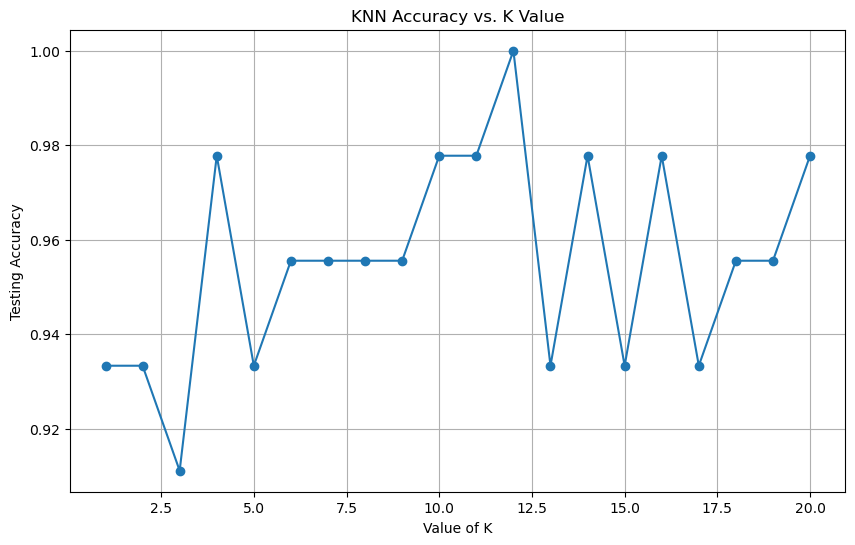

The optimal K value based on testing accuracy is: 12


In [27]:
# CODE CELL 4: Finding the Optimal K (Hyperparameter Tuning Example)
# Test accuracy for different values of K (e.g., K=1 to K=20)
k_range = range(1, 21)
scores = {}
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred_k = knn.predict(X_test_scaled)
    scores[k] = accuracy_score(y_test, y_pred_k)

# Visualize K vs. Accuracy
plt.figure(figsize=(10, 6))
plt.plot(list(scores.keys()), list(scores.values()), marker='o')
plt.title('KNN Accuracy vs. K Value')
plt.xlabel('Value of K')
plt.ylabel('Testing Accuracy')
plt.grid(True)
plt.show()

# Find the best K
best_k = max(scores, key=scores.get)
print(f"The optimal K value based on testing accuracy is: {best_k}")